# Mineração de Dados com Python

mall_customers: https://raw.githubusercontent.com/tanishq21/Mall-Customers/refs/heads/main/Mall_Customers.csv

### **5. Mineração de Dados**

**Exercício 5.1:**
Utilize o dataset `mall_customers.csv` (disponível em muitos repositórios de datasets). Realize uma análise de clusters usando o algoritmo K-Means para agrupar os clientes com base em `Annual Income (k$)` e `Spending Score (1-100)`. Determine o número ideal de clusters usando o método do cotovelo.

**Exercício 5.2:**
Aplique o algoritmo Apriori para encontrar regras de associação no dataset `groceries.csv` (disponível em repositórios de datasets). Defina um suporte mínimo de 0.01 e uma confiança mínima de 0.3.

In [1]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## MALL CUSTOMERS

In [ ]:
# dados
df = pd.read_csv('https://raw.githubusercontent.com/tanishq21/Mall-Customers/refs/heads/main/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


*EXPLORAÇÃO*

In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns.to_list()

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df['Genre'].value_counts()

,count
Genre,
Female,112
Male,88


<Axes: xlabel='Genre', ylabel='count'>

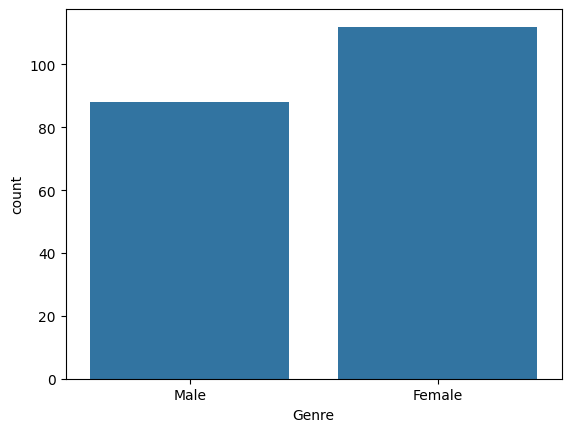

In [ ]:
sns.countplot(x='Genre', data=df)

In [ ]:
df.groupby('Genre').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


<Axes: xlabel='Genre', ylabel='Age'>

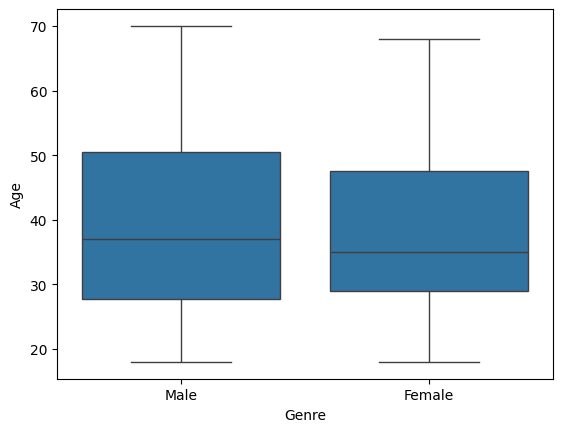

In [ ]:
sns.boxplot(x='Genre', y='Age', data=df)

<Axes: xlabel='Genre', ylabel='Annual Income (k$)'>

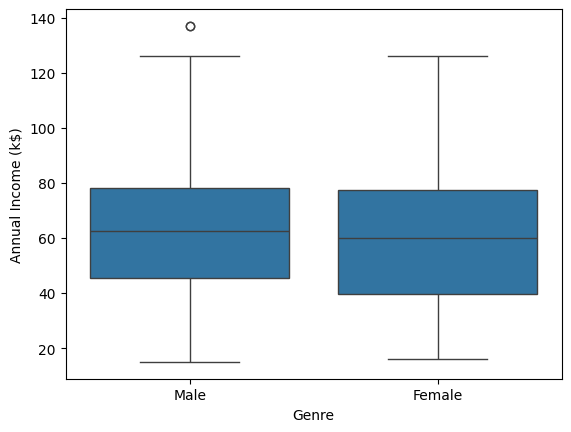

In [ ]:
sns.boxplot(x='Genre', y='Annual Income (k$)', data=df)

<Axes: xlabel='Genre', ylabel='Spending Score (1-100)'>

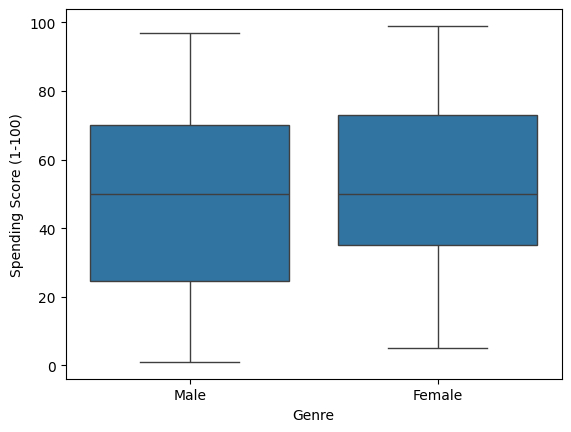

In [ ]:
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df)

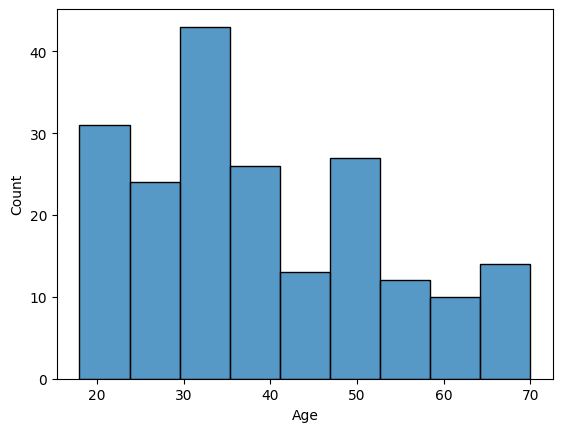

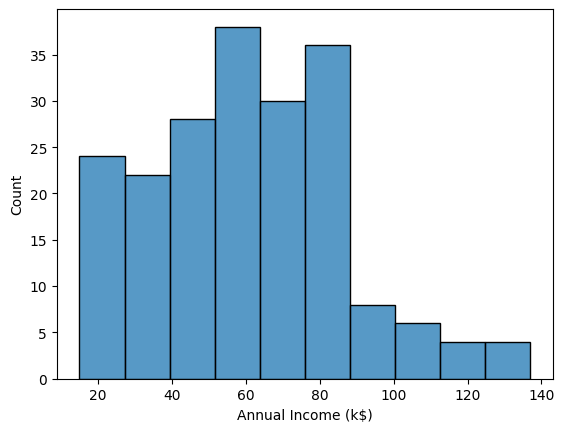

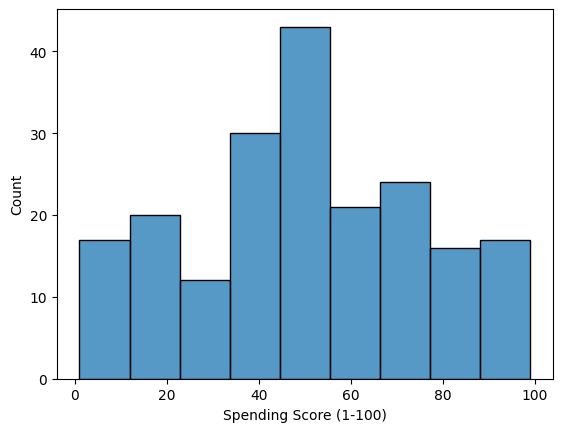

In [ ]:
for i, col in enumerate(df.iloc[:,2:5]):
    plt.figure(i)
    sns.histplot(x=col, data=df)

In [ ]:
df.select_dtypes(exclude='object').corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

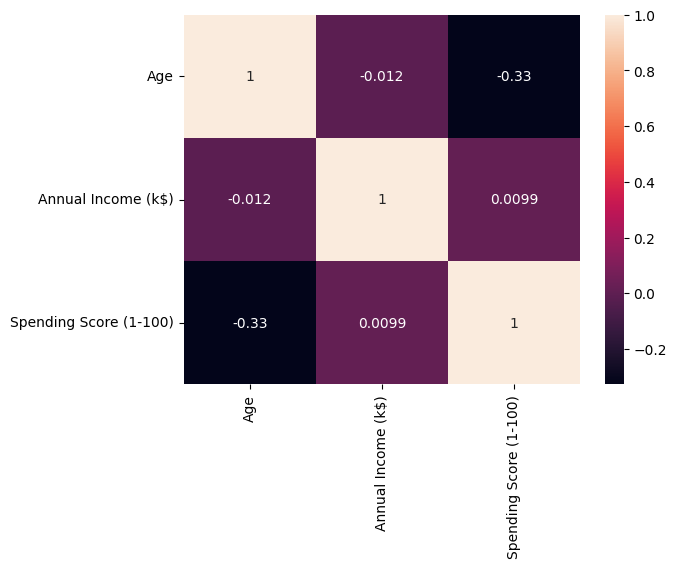

In [ ]:
sns.heatmap(df.drop('CustomerID', axis=1).select_dtypes(exclude='object').corr(), annot=True)

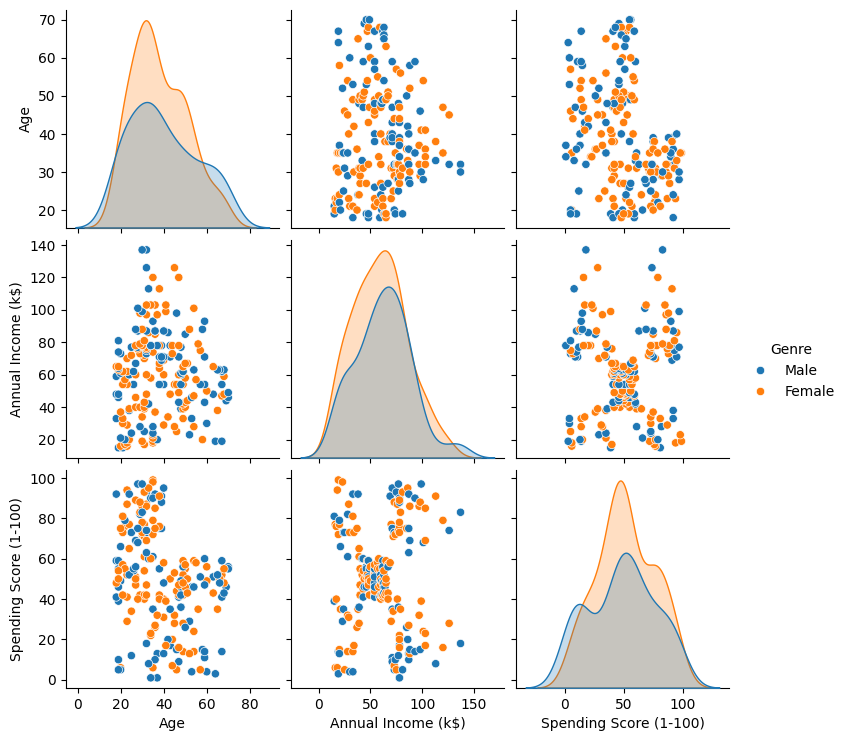

In [ ]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Genre')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

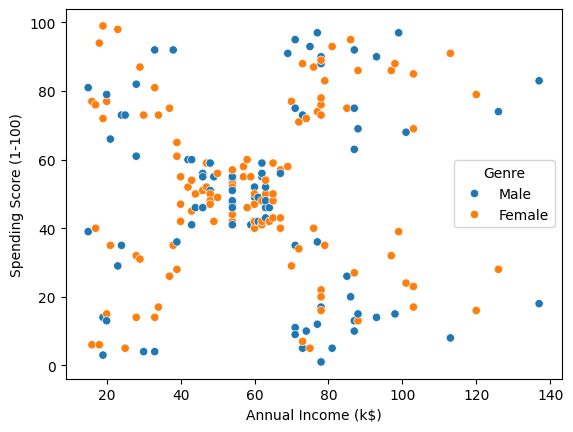

In [ ]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue="Genre",data=df)

PRE PROCESSAMENTO

In [ ]:
df2 = df.copy()

In [ ]:
df2.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
df2.drop(['CustomerID'], axis=1, inplace=True)
df2['Genre'] = df2['Genre'].map({'Female': 0, 'Male': 1})

In [ ]:
df2.head(3)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


In [ ]:
# escalonamento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

dados = scaler.fit_transform(df2)
dados

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [ ]:
# buscando k com elbow method
from sklearn.cluster import KMeans

k = []
k_range = range(1,10)
for i in k_range:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dados)
    k.append(kmeans.inertia_)

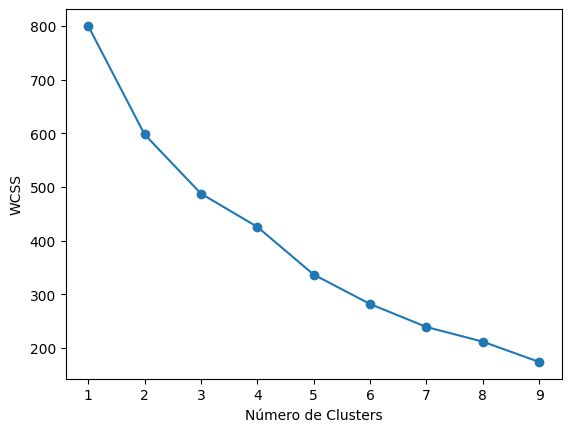

In [ ]:
plt.plot(k_range, k, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# modelo
kmeans = KMeans(n_clusters=5)
kmeans.fit(dados)

KMeans(n_clusters=5)

In [ ]:
df2['cluster'] = kmeans.fit_predict(dados)
df2.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0


In [ ]:
df2['cluster'].value_counts()

,count
cluster,
0,53
1,43
4,39
2,36
3,29


In [ ]:
# centroides
kmeans.cluster_centers_

array([[-0.0881844 , -1.01427998, -0.78404329,  0.4463747 ],
       [-0.88640526,  0.78684665, -0.43236199, -0.39327144],
       [ 1.12815215,  1.16899963, -0.29386219, -0.52322837],
       [ 0.0166722 , -0.16988908,  1.10528137, -1.25005425],
       [ 0.04339047, -0.44191719,  0.99158305,  1.23950275]])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

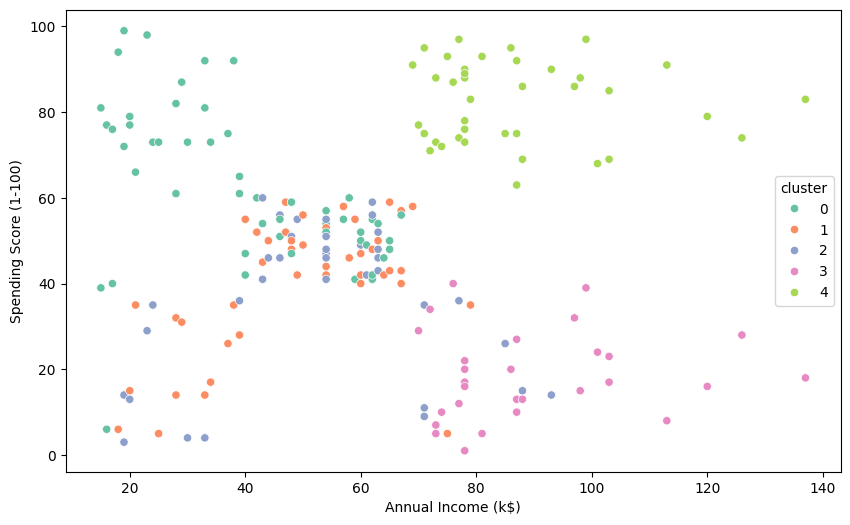

In [ ]:
# plot modelo
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=df2, palette='Set2')

## GROCERIES

In [2]:
# dados
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/refs/heads/master/groceries%20-%20groceries.csv')

EXPLORAÇÃO

In [3]:
# primeiras linhas
df.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.to_csv('groceries.csv', index=False)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

In [5]:
# ausentes
df.isna().sum()

,0
Item(s),0
Item 1,0
Item 2,2159
Item 3,3802
Item 4,5101
Item 5,6106
Item 6,6961
Item 7,7606
Item 8,8151
Item 9,8589


PRE PROCESSAMENTO

In [10]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
df2 = df.copy()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# transformando dataset em lista
transactions = df2.apply(lambda x: [str(item) for item in x.dropna().tolist()], axis=1).tolist()
transactions[:5]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['4', 'citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['3', 'tropical fruit', 'yogurt', 'coffee'],
 ['1', 'whole milk'],
 ['4', 'pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['4',
  'other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [14]:
# binarizando
encoder = TransactionEncoder()
transactions_encoded = encoder.fit_transform(transactions)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# revertendo para dataframe
df_encoded = pd.DataFrame(transactions_encoded, columns=encoder.columns_)
df_encoded.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1,10,11,12,13,14,15,16,17,18,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [17]:
# apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.219522,(1)
1,0.025013,(10)
2,0.018505,(11)
3,0.011896,(12)
4,0.167056,(2)
...,...,...
406,0.011998,"(whole milk, tropical fruit, root vegetables)"
407,0.014540,"(whole milk, yogurt, root vegetables)"
408,0.010473,"(soda, yogurt, whole milk)"
409,0.015150,"(whole milk, tropical fruit, yogurt)"


In [18]:
# rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)
rules

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(canned beer),(1),0.077682,0.219522,0.026436,0.340314,1.550250,1.0,0.009383,1.183105,0.384838,0.097634,0.154767,0.230370
1,(10),(other vegetables),0.025013,0.193493,0.010778,0.430894,2.226929,1.0,0.005938,1.417149,0.565085,0.051884,0.294358,0.243298
2,(10),(whole milk),0.025013,0.255516,0.011896,0.475610,1.861370,1.0,0.005505,1.419714,0.474633,0.044285,0.295633,0.261084
3,(11),(other vegetables),0.018505,0.193493,0.010269,0.554945,2.868042,1.0,0.006689,1.812152,0.663610,0.050907,0.448170,0.304010
4,(11),(whole milk),0.018505,0.255516,0.011083,0.598901,2.343889,1.0,0.006354,1.856111,0.584169,0.042150,0.461239,0.321138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,"(soda, yogurt)",(whole milk),0.027351,0.255516,0.010473,0.382900,1.498535,1.0,0.003484,1.206423,0.342037,0.038447,0.171103,0.211943
135,"(whole milk, tropical fruit)",(yogurt),0.042298,0.139502,0.015150,0.358173,2.567516,1.0,0.009249,1.340701,0.637483,0.090909,0.254122,0.233387
136,"(tropical fruit, yogurt)",(whole milk),0.029283,0.255516,0.015150,0.517361,2.024770,1.0,0.007668,1.542528,0.521384,0.056184,0.351714,0.288326
137,"(whipped/sour cream, whole milk)",(yogurt),0.032232,0.139502,0.010880,0.337539,2.419607,1.0,0.006383,1.298943,0.606250,0.067636,0.230143,0.207764
